In [4]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx')

https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [9]:
print open('data/CCPP/Readme.txt').read()

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measuremen

In [3]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [4]:
data.cov()

,AT,V,AP,RH,PE
AT,55.539357,79.941324,-22.463437,-59.032171,-120.593715
V,79.941324,161.490544,-31.206771,-57.922808,-188.642778
AP,-22.463437,-31.206771,35.269152,8.633874,52.546510
RH,-59.032171,-57.922808,8.633874,213.167848,97.129952
PE,-120.593715,-188.642778,52.546510,97.129952,291.282318


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

(0, 100)

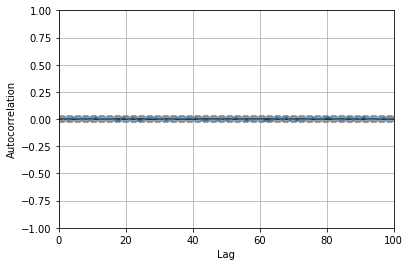

In [6]:
pd.tools.plotting.autocorrelation_plot(data.PE)
plt.xlim((0, 100))

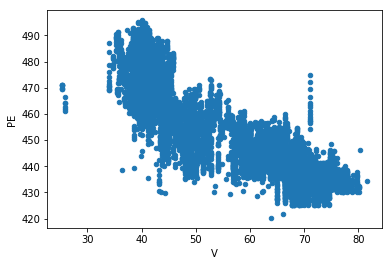

In [7]:
data.plot.scatter(x = 'V', y = 'PE')

In [6]:
data['Vp'] = np.round(data['V'], 1)

In [7]:
data = data.groupby('Vp', as_index=False).mean()

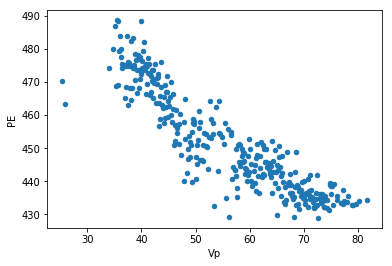

In [88]:
data.groupby('Vp', as_index=False).mean().plot.scatter(x='Vp', y='PE')

In [10]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(data[['Vp']], data.PE, test_size = 0.3)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
r5 = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [18]:
import numpy as np

In [19]:
np.var(y_test - r5.predict(X_test))

54.774806501910682

In [20]:
np.var(y_test - y_test.mean())

260.37438798721689

In [21]:
def RSS(f, y, X):
    return sum((y - f.predict(X))**2)

In [44]:
len(y_train)

234

In [90]:
ks = np.arange(1, 100)
models = [KNeighborsRegressor(n_neighbors=i).fit(X_train, y_train) for i in ks]
RSS_test = [RSS(f, y_test, X_test) for f in models]

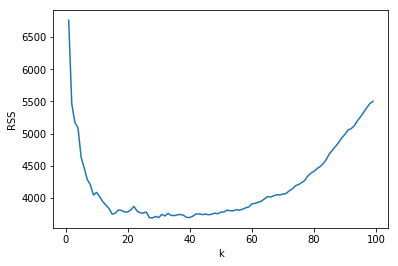

In [91]:
plt.plot(ks, RSS_test)
plt.xlabel('k')
plt.ylabel('RSS')

In [92]:
RSS_train = [RSS(f, y_train, X_train) for f in models]

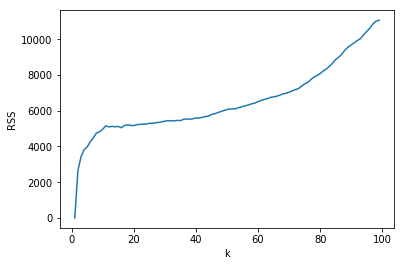

In [93]:
plt.plot(ks, RSS_train)
plt.xlabel('k')
plt.ylabel('RSS')

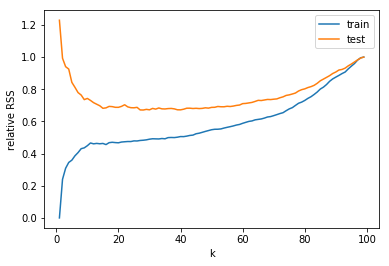

In [94]:
plt.plot(ks, np.array(RSS_train)/RSS_train[-1], label='train')
plt.plot(ks, np.array(RSS_test)/RSS_test[-1], label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('relative RSS')

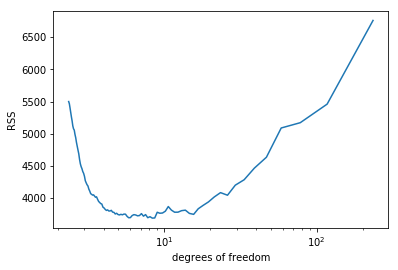

In [96]:
plt.plot(float(len(y_train)) / ks, RSS_test)
plt.xlabel('degrees of freedom')
plt.ylabel('RSS')
plt.xscale('log')

In [97]:
plot_ks = (1, 5, 25)
plot_models = [models[list(ks).index(i)] for i in plot_ks]

(430, 455)

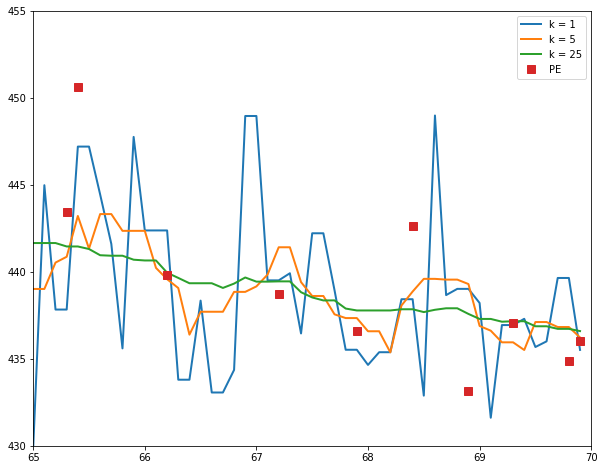

In [110]:
plt.gcf().set_size_inches(10,8)
for k, f in zip(plot_ks, plot_models):
    xs = [[i] for i in np.arange(65, 70, 0.1)]
    plt.plot(xs, f.predict(xs), label="k = {}".format(k),
            linewidth=2)
plt.plot(X_test, y_test, 's', markersize=8)
plt.legend()
plt.xlim((65, 70))
plt.ylim((430, 455))

In [16]:
from sklearn.linear_model import LinearRegression

In [65]:
f_lr = LinearRegression().fit(X_train, y_train)

In [66]:
RSS(f_lr, y_test, X_test)

4629.5985224299511

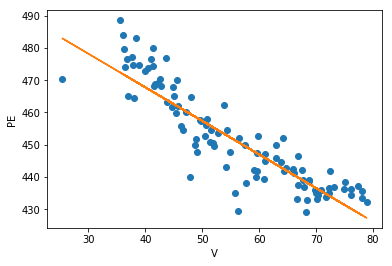

In [67]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, f_lr.predict(X_test))
plt.xlabel('V')
plt.ylabel('PE')

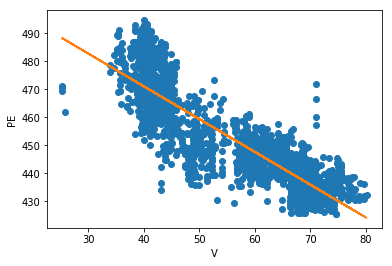

In [79]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, f_lr.predict(X_test))
plt.xlabel('V')
plt.ylabel('PE')

In [69]:
data['VpSQ'] = data.V**2

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data[['Vp', 'VpSQ']], data.PE, test_size = 0.3)

In [71]:
f_lr = LinearRegression().fit(X_train, y_train)
RSS(f_lr, y_test, X_test)

3307.6834006090839

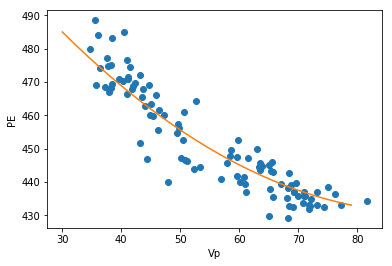

In [73]:
plt.plot(X_test.Vp, y_test, 'o')
plt.plot(np.arange(30, 80), 
         f_lr.predict([[i, i**2] for i in np.arange(30, 80)]))
plt.xlabel('Vp')
plt.ylabel('PE')

2331.63409029


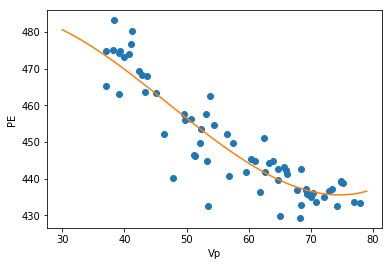

In [75]:
data['VpQB'] = data.V**3
X_train, X_test, y_train, y_test = train_test_split(data[['Vp', 'VpSQ', 'VpQB']], data.PE, test_size = 0.2)
f_lr = LinearRegression().fit(X_train, y_train)
print RSS(f_lr, y_test, X_test)
plt.plot(X_test.Vp, y_test, 'o')
plt.plot(np.arange(30, 80), 
         f_lr.predict([[i, i**2, i**3] for i in np.arange(30, 80)]))
plt.xlabel('Vp')
plt.ylabel('PE')

In [46]:
data = pd.read_excel('data/CCPP/Folds5x2_pp.xlsx')

In [24]:
data.V = data.V.apply(lambda x: np.round(x, 1))

In [25]:
data = data.groupby('V', as_index=False).apply(np.mean)

In [11]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.890610,-0.589787,-0.559993,-0.966657
V,0.890610,1.000000,-0.501646,-0.450759,-0.904364
AP,-0.589787,-0.501646,1.000000,0.122911,0.617252
RH,-0.559993,-0.450759,0.122911,1.000000,0.453214
PE,-0.966657,-0.904364,0.617252,0.453214,1.000000


In [12]:
xs = ['AT', 'V', 'AP', 'RH']

In [13]:
import itertools

In [34]:
def LinRSS(X, y):
    yhat = LinearRegression().fit(X, y).predict(X)
    return np.sum((y - yhat)**2)

In [47]:
RSS_vals = {}
for i in range(1, 5):
    RSS_vals[i] = {}
    for x in itertools.combinations(xs, i):
        RSS_vals[i][x] = LinRSS(data[list(x)], data.PE)

In [39]:
RSS_vals

{1: {('AP',): 47987.995189596899,
  ('AT',): 5083.6675449386821,
  ('RH',): 61601.20817464334,
  ('V',): 14119.372967718486},
 2: {('AP', 'RH'): 36779.800164034103,
  ('AT', 'AP'): 4819.6096390233561,
  ('AT', 'RH'): 4206.9152757843221,
  ('AT', 'V'): 4376.011958815061,
  ('V', 'AP'): 11347.268211111448,
  ('V', 'RH'): 13917.378537081298},
 3: {('AT', 'AP', 'RH'): 4151.5769581153354,
  ('AT', 'V', 'AP'): 4052.0690515099491,
  ('AT', 'V', 'RH'): 3677.0521685449294,
  ('V', 'AP', 'RH'): 10887.509419491023},
 4: {('AT', 'V', 'AP', 'RH'): 3576.380141773443}}

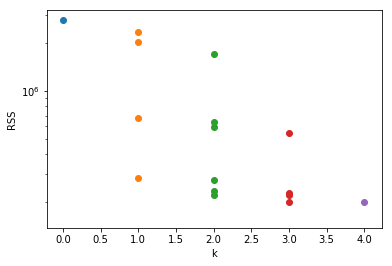

In [49]:
plt.scatter([0], np.sum((data.PE - np.mean(data.PE))**2))
for i in range(1, 5):
    y = RSS_vals[i].values()
    plt.scatter([i]*len(y), y)
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('RSS')